##  Here, we use PyTorch to solve for the coefficients of a one-dimensional Rastrigin function

See the following blog post: 
https://en.wikipedia.org/wiki/Rastrigin_function

## Problem description

Here is the 1D Rastrigin function
<br>
<br>
$$
f(x) = 10 + x^2 -10~cos(2\pi~x)~.~~~~~~~~~~~~~~~~~~~~~~(1)
$$
<br>

In this notebook, we show how to use gradient descent in PyTorch to solve for coefficients $A$ and $B$ in the more general form:
<br>
<br>
$$
f(x) = A + x^2 -B~cos(2\pi~x)~.~~~~~~~~~~~~~~~~~~~~~~(2)
$$
<br>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Here are the default 1D coefficients: A = B = 10
# They need not be the same and you can change them here if you want
A, B = 10.0, 10.0     # Default: A = B = 10

# Generate N random samples where the Rastrigin will be computed - we're not using an equi-spaced domain
# Don't use too few points or the oscillatory behavior will not be evident
N = 100      # Default: N = 100
x_in = 1.5 * np.random.randn(N,1) # Here are randomly selected x values
# Uncomment the following line if you want an equi-spaced domain
x_in = np.linspace(-5.14, 5.14, 2*N).reshape(-1, 1)

# Here is the ideal 1D Rastrigin function
y_ideal = A + x_in**2 - B * np.cos(2 * np.pi * x_in)

# Start with three random coefficients - one of them will finally be unity
# That is w[0] = A, w[1] = 1, and w[2] = B when we are done.
# Make sure we follow this order when we build the x_func tensor below
w = np.random.randn(3, 1)
# We could force w[1] to be unity assuming we know this in advance - not required though
w[1] = 1.0 # w[1] will still vary a little, but start off with it at its final value

# Make the coefficient tensor
w = torch.tensor(w, dtype=torch.float32, requires_grad=True)

# Print out the starting coefficients
print(f'Initial A = {np.round(w.detach().numpy()[0].item(), 2)}')
print(f'Initial B = {np.round(w.detach().numpy()[2].item(), 2)}')
print()

# We now build an N x M input array, where N is the number of samples, and the M columns are 
# the 3 terms of the Rastrigin function.  You need to note the order/column of the terms
# in order to keep track of the coefficients we are solving for and be consistent with the 
# w vector created above.  Here, A is in the 0th column and B is in the 2nd column.
x_func = np.hstack([np.ones_like(x_in), x_in*x_in, -np.cos(2*np.pi*x_in)])

# Here is the input tensor:
x = torch.tensor(x_func, dtype=torch.float32)  
# Here is the ideal output tensor:
y = torch.tensor(y_ideal, dtype=torch.float32) 

optimizer = torch.optim.NAdam([w], lr=0.01)

# Empty lists to hold loss and parameter histories as training evolves
loss_history = []
one_history = []
A_history = []
B_history = []

# Gradient descent done here
for _ in range(5000):
    y_pred = torch.matmul(x, w)
    mse = torch.mean(torch.square(y - y_pred))
    optimizer.zero_grad()
    A_history.append(w[0].item())
    B_history.append(w[2].item())
    loss_history.append(mse.item())
    #one_history.append(w[1].item())  # Can be used to check what is happening to w[1]
    mse.backward()    # Compute gradient of loss wrt w's
    optimizer.step()
    
print(f'Final A = {np.round(w.detach().numpy()[0].item(), 2)}')
print(f'Final B = {np.round(w.detach().numpy()[2].item(), 2)}')
print()

# Here is the final MSE after fitting
final_mse = np.round(mse.detach().item(), 4)
print(f'Final MSE = {final_mse}')

Initial A = -0.48
Initial B = -0.42

Final A = 10.0
Final B = 10.0

Final MSE = 0.0


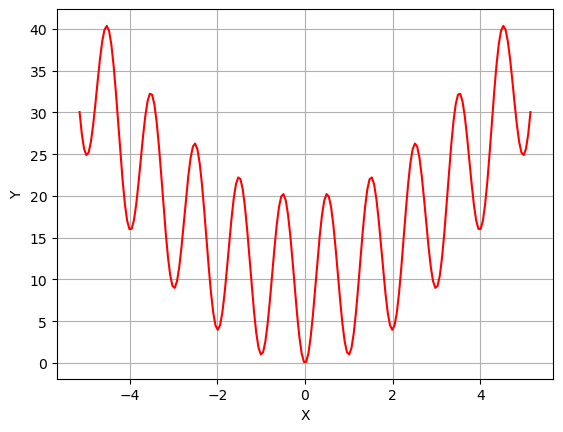

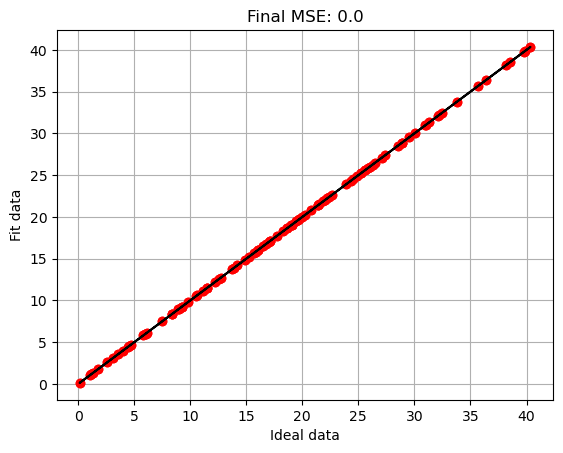

In [26]:
# Show ideal Rastrigin values as well as the fitted values
plt.figure()
plt.plot(x_in, y.detach().numpy(), 'r-', label = "Ideal data")
#plt.plot(x_in, y_pred.detach().numpy(), "b*", label = "Fit data")
plt.xlabel("X")
plt.ylabel("Y")
#plt.title(f'Final MSE: {final_mse}')
#plt.legend()
plt.grid();

# Show fit results vs. the ground truth values
plt.figure()
plt.plot(y.detach().numpy(), y_pred.detach().numpy(), "ro")
plt.plot(y_ideal, y_ideal, "k-")  # Here is the 1:1 regression line
plt.xlabel("Ideal data")
plt.ylabel("Fit data")
plt.title(f'Final MSE: {final_mse}')
plt.grid();

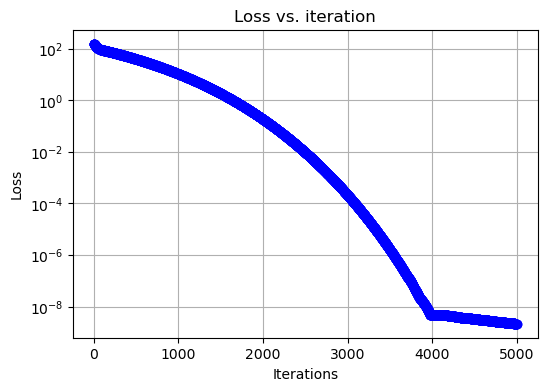

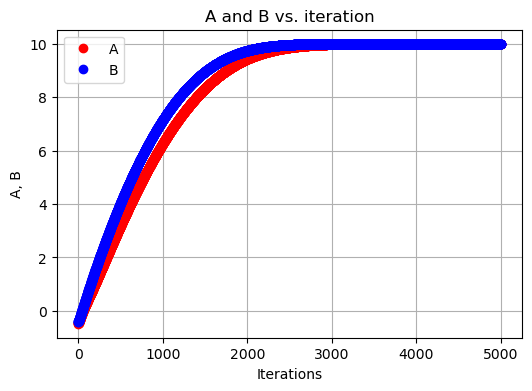

In [24]:
# Show the loss history
plt.figure(figsize=(6,4))
plt.semilogy(loss_history, 'bo')
plt.grid()
plt.title("Loss vs. iteration")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# And see how the A and B parameters converge
plt.figure(figsize=(6,4))
plt.plot(A_history, 'ro', label='A')
plt.plot(B_history, 'bo', label='B')
plt.title("A and B vs. iteration")
plt.xlabel('Iterations')
plt.ylabel('A, B')
plt.legend()
plt.grid()
plt.show()